In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import imageio

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'axes.labelsize': 'large'
})

# Meritev spektra živega srebra z uklonsko mrežico

Uklonska mrežica je kot nepropustnega materiala z velikim številom rež, ki so primerljive z valovno dolžino svetlobe. Lahko jo gledamo kot množico točkovnih izvorov — kar pomeni, da na veliki razdalji stran od mrežice na določenih kotih vidimo ojačitve. Če je kot med vpadno svetlobo in pravokotnico na uklonsko mrežico $\beta$, kot med pravokotnico in izhodnim žarkov pa $\varphi$, bomo na desni strani ojačitve videli pri pogoju

$$d(\sin \varphi + \sin \beta) = n \lambda,$$

na levi pa pri

$$d(\sin \varphi - \sin \beta) = n \lambda,$$

kjer je $d$ karakteristična razdalja med režami, $\lambda$ valovna dolžina svetlobe in $n$ naravno število, t. i. red uklonitve.

<img src="sketch.jpg" width=400>

## Namen

S spektroskopom na uklonsko mrežico določiti spekter živosrebrne pare.

## Pribor

Živosrebrna svetilka, spektroskop na uklonsko mrežico.

## Meritve

Prižgemo živosrebrno svetilko. Mizo z uklonsko mrežico zavrtimo, da svetloba vpada pravokotno. Naravnost naprej vidimo ojačitev za $n = 0$ — zapišemo kot na vrtljivi mizi.

In [2]:
perp_φ_0 = np.deg2rad(179)

Nato vrtimo okular in zapišemo kote, kjer vidimo ojačitve prvega redu 

In [3]:
perp_1st_R_φ = np.deg2rad(np.array([
    193.2, 194.1, 196.2, 198.1, 199.3, 199.4
]))
perp_1st_L_φ = np.deg2rad(np.array([
    164.8, 163.7, 161.8, 159.9, 158.8, 158.7
]))

in drugega redu

In [4]:
perp_2nd_R_φ = np.deg2rad(np.array([
    208.3, 210.8, 220.6, 223.5, 223.8
]))

Nato mizo z uklonsko mrežico zavrtimo za $\sim 20^\circ$ in ponovimo meritve.

In [5]:
β_φ_0 = np.deg2rad(159.3)
β_1st_R_φ = np.deg2rad(np.array([
    173.4, 174.5, 176.4, 178.2, 179.4, 179.5
]))
β_1st_L_φ = np.deg2rad(np.array([
    143.9, 142.6, 140.6, 137.9, 136.5, 136.4
]))
β_2nd_R_φ = np.deg2rad(np.array([
    187.5, 189.6, 193.5, 197.5, 199.8, 200
]))
β_2nd_L_φ = np.deg2rad(np.array([
    121.5, 99.4
]))
np.rad2deg(β_1st_R_φ - β_φ_0), np.rad2deg(β_1st_L_φ - β_φ_0)

(array([14.1, 15.2, 17.1, 18.9, 20.1, 20.2]),
 array([-15.4, -16.7, -18.7, -21.4, -22.8, -22.9]))

Uporabljamo uklonsko mrežico z 600 režami na milimeter.

In [6]:
d = 1e-3/600

## Račun


S pogoji in tem, da vemo, katerega reda je določena ojačitev, lahko izračunamo valovno dolžino svetlobe v posamezni ojačitvi.

In [7]:
perp_1st_R_λ = d * np.sin(perp_1st_R_φ - perp_φ_0)
perp_1st_L_λ = d * -np.sin(perp_1st_L_φ - perp_φ_0)
perp_2nd_R_λ = d * np.sin(perp_2nd_R_φ - perp_φ_0) / 2

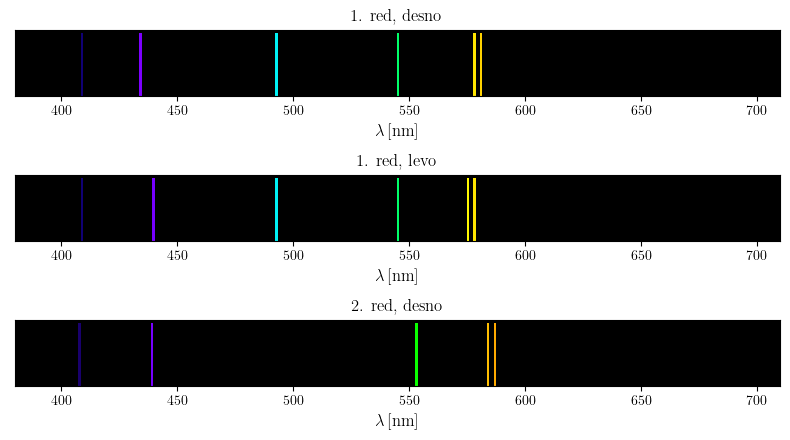

In [27]:
spectrum = imageio.imread('sRGB-approx.png', pilmode='RGB')[0]

def colors(λ):
    i = np.interp(λ, [380e-9, 710e-9], [0, len(spectrum)]).astype(int)
    return spectrum[i] / 255

fig, axs = plt.subplots(3, 1, figsize=[8, 4.5])

axs[0].bar(1e9 * perp_1st_R_λ, 1, width=1, color=colors(perp_1st_R_λ))
axs[1].bar(1e9 * perp_1st_L_λ, 1, width=1, color=colors(perp_1st_L_λ))
axs[2].bar(1e9 * perp_2nd_R_λ, 1, width=1, color=colors(perp_2nd_R_λ))

axs[0].set_title('1. red, desno')
axs[1].set_title('1. red, levo')
axs[2].set_title('2. red, desno')
for i in range(0, 3 * 1):
    axs[i].set_xlabel(r'$\lambda\,[\mathrm{nm}]$')
    axs[i].set_facecolor('black')
    axs[i].set_xlim(380, 710)
    axs[i].set_yticks([])
    axs[i].set_yticklabels([])
fig.tight_layout()

Enako storimo še za meritve z uklonsko mrežico pod kotom. Prva ojačitev leži v ravnini, pravokotni na uklonsko mrežico. Kot za katerega smo zavrteli uklonsko mrežico, je torej

In [9]:
β = perp_φ_0 - β_φ_0
np.rad2deg(β)

19.699999999999996

Z upoštevanjem pogojem izračunamo valovne dolžine.

In [10]:
β_1st_R_λ = d * (np.sin(β_1st_R_φ - β_φ_0 - β) + np.sin(β))
β_1st_L_λ = d * (np.sin(β_φ_0 - β_1st_L_φ + β) - np.sin(β))
β_2nd_R_λ = d * (np.sin(β_2nd_R_φ - β_φ_0 - β) + np.sin(β)) / 2
β_2nd_L_λ = d * (np.sin(β_φ_0 - β_2nd_L_φ + β) - np.sin(β)) / 2

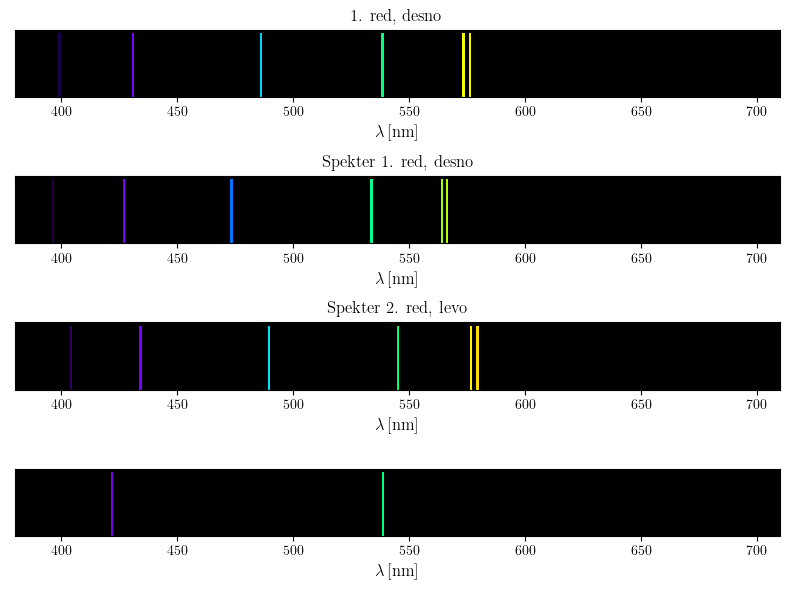

In [28]:
fig, axs = plt.subplots(4, 1, figsize=[8, 6])

axs[0].bar(1e9 * β_1st_R_λ, 1, width=1, color=colors(β_1st_R_λ))
axs[1].bar(1e9 * β_1st_L_λ, 1, width=1, color=colors(β_1st_L_λ))
axs[2].bar(1e9 * β_2nd_R_λ, 1, width=1, color=colors(β_2nd_R_λ))
axs[3].bar(1e9 * β_2nd_L_λ, 1, width=1, color=colors(β_2nd_L_λ))

axs[0].set_title('1. red, desno')
axs[1].set_title('Spekter 1. red, desno')
axs[2].set_title('Spekter 2. red, levo')
for i in range(0, 4 * 1):
    axs[i].set_xlabel(r'$\lambda\,[\mathrm{nm}]$')
    axs[i].set_facecolor('black')
    axs[i].set_xlim(380, 710)
    axs[i].set_yticks([])
    axs[i].set_yticklabels([])
fig.tight_layout()

In [26]:
l = [β_1st_R_λ, β_1st_L_λ, β_2nd_R_λ, β_1st_R_λ, β_1st_L_λ, β_2nd_R_λ, β_2nd_L_λ]
λ_average = np.array([
    1/6 * (l[0][0] + l[1][0] + l[2][0] + l[3][0] + l[4][0] + l[5][0]),
    1/7 * (l[0][1] + l[1][1] + l[2][1] + l[3][1] + l[4][1] + l[5][1] + l[6][0]),
    1/5 * (l[0][2] + l[1][2] + l[3][2] + l[4][2] + l[5][2]),
    1/7 * (l[0][3] + l[1][3] + l[2][2] + l[3][3] + l[4][3] + l[5][3] + l[6][1]),
    1/6 * (l[0][4] + l[1][4] + l[2][3] + l[3][4] + l[4][4] + l[5][4]),
    1/6 * (l[0][5] + l[1][5] + l[2][4] + l[3][5] + l[4][5] + l[5][5]),
])
1e9 * λ_average

array([399.9303817 , 429.55102011, 481.76907185, 531.19091089,
       566.23444546, 573.62159021])

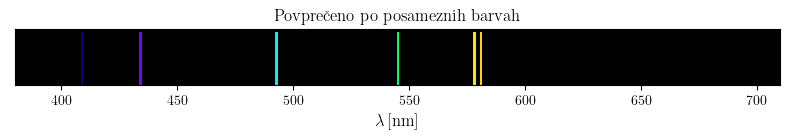

In [29]:
fig, ax = plt.subplots(1, 1, figsize=[8, 1.5])

ax.bar(1e9 * perp_1st_R_λ, 1, width=1, color=colors(perp_1st_R_λ))

ax.set_title('Povprečeno po posameznih barvah')
ax.set_xlabel(r'$\lambda\,[\mathrm{nm}]$')
ax.set_facecolor('black')
ax.set_xlim(380, 710)
ax.set_yticks([])
ax.set_yticklabels([])
fig.tight_layout()

To lahko zdaj primerjamo s podatki na internetu.

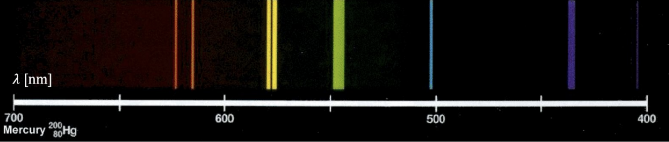

Slika je sicer zrcalna, a vseeno lahko prepoznamo, da sta spektra dovolj podobna, da bi tako lahko prepoznali element, tudi če ne bi vedeli, da je svetilka živosrebrna.